In [2]:
# 딥러닝을 구동하는데 필요한 케라스 함수를 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러오기
import numpy as np
import tensorflow as tf

In [3]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터 로드
Data_set = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=',')

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:,0:17]
Y = Data_set[:,17]

In [6]:
# 딥러닝 구조를 결정 (모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 931us/step - loss: 4.1148 - accuracy: 0.7000
Epoch 2/100
47/47 [==============================] - 0s 805us/step - loss: 1.5776 - accuracy: 0.7809
Epoch 3/100
47/47 [==============================] - 0s 763us/step - loss: 1.0285 - accuracy: 0.7979
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.7678 - accuracy: 0.7660
Epoch 5/100
47/47 [==============================] - 0s 867us/step - loss: 0.5719 - accuracy: 0.8106
Epoch 6/100
47/47 [==============================] - 0s 859us/step - loss: 0.4917 - accuracy: 0.8340
Epoch 7/100
47/47 [==============================] - 0s 872us/step - loss: 0.4767 - accuracy: 0.8362
Epoch 8/100
47/47 [==============================] - 0s 812us/step - loss: 0.4581 - accuracy: 0.8447
Epoch 9/100
47/47 [==============================] - 0s 822us/step - loss: 0.4377 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 821us/step - loss: 0.4500 - accuracy

---

Epoch 1/30
200/200 [==============================] - 0s 650us/step - loss: 1.4502 - mse: 1.4502
Epoch 2/30
200/200 [==============================] - 0s 714us/step - loss: 0.1729 - mse: 0.1729
Epoch 3/30
200/200 [==============================] - 0s 642us/step - loss: 0.1615 - mse: 0.1615
Epoch 4/30
200/200 [==============================] - 0s 659us/step - loss: 0.1485 - mse: 0.1485
Epoch 5/30
200/200 [==============================] - 0s 619us/step - loss: 0.1371 - mse: 0.1371
Epoch 6/30
200/200 [==============================] - 0s 648us/step - loss: 0.1294 - mse: 0.1294
Epoch 7/30
200/200 [==============================] - 0s 677us/step - loss: 0.1192 - mse: 0.1192
Epoch 8/30
200/200 [==============================] - 0s 630us/step - loss: 0.1148 - mse: 0.1148
Epoch 9/30
200/200 [==============================] - 0s 640us/step - loss: 0.1112 - mse: 0.1112
Epoch 10/30
200/200 [==============================] - 0s 616us/step - loss: 0.1056 - mse: 0.1056
Epoch 11/30
200/200 [========

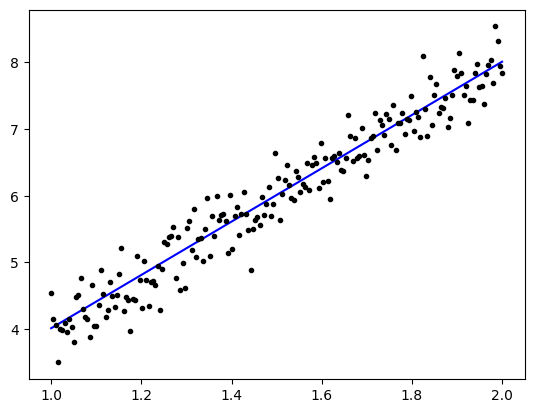

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 가상적인 데이터 생성
X = data = np.linspace(1, 2, 200)   # 시작값 = 1, 종료값 = 2, 개수 = 200
y = X*4 + np.random.randn(200) * 0.3    # x를 4배로 하고 편차 0.3정도의 가우시안 잡음 추가

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.fit(X, y, batch_size=1, epochs=30)

predict = model.predict(data)
plt.plot(data, predict, 'b', data, y, 'k.') # 첫 번째 그래프는 파란색 마커로, 두번째 그래프는 검정색.으로 그린다
plt.show()

---

> 참 거짓 판단 장치 : 로지스틱 회귀

(-0.1, 1.1)

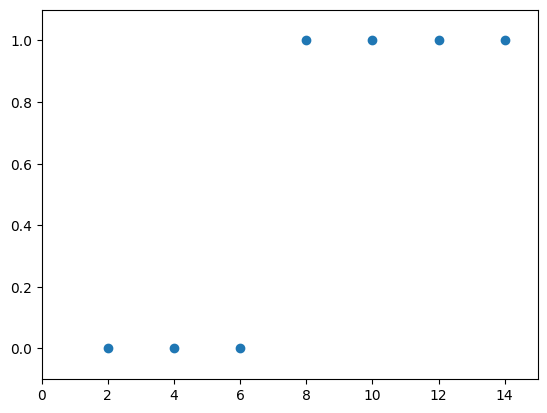

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만든다
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프로 나타내기
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.10)

In [9]:
# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

# 학습률을 정한다
lr = 0.05

# 시그모이드 함수를 정의
def sigmoid(x):
    return 1/(1+np.e**(-x))

# 경사 하강법 실시
for i in range(2001):
    for x_data, y_data in data :
        a_diff = x_data * (sigmoid(a*x_data + b) - y_data)
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        
        if i % 1000 == 0:   # 1000번 반복될 때마다 각 x_data 값에 대한 현재의 a값, b값을 출력
            print('epoch=%.f, 기울기=%.04f, 절편=%.04f' % (i, a, b))

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
